# Interpolación

En el notebook anterior, vimos cómo se puede discretizar una función continua para calcular numéricamente una derivada.

Un problema muy común en el cómputo científico es el problema opuesto: tenemos datos discretos, y queremos encontrar una función continua que los aproxime. Una manera de hacer esto es la **interpolación**: 

> Dados datos $(x_i, y_i)$ para $i=1,\ldots,N$,  encontrar una función $f(x)$ que pase exactamente por los puntos, es decir, tal que $f(x_i) = y_i$ para cada $i$.

La interpolación provee, entre otras cosas, una manera de formalizar la derivación de diferencias finitas para calcular derivadas, y para llevar a cabo integrales de manera numérica. Mucho más allá, provee también una manera para manipular funciones de forma numérica.

Podríamos escoger distintas clases de función $f$ con las cuales interpolar. Aquí, trabajaremos con los **polinomios** y la llamada **interpolación de Lagrange**.

#### Ejercicio 1

El primer caso que tratar es con $N=2$, es decir encontrar una función que interpole entre los puntos $(x_1, y_1)$ y $(x_2, y_2)$. Es claro que basta utilizar una recta para hacerlo. Para encontrar cuál recta es, hacemos lo siguiente.

(i) Define una función $L_1(x)$ que es lineal en $x$, tal que $L_1(x)$ tome el valor $0$ en $x = x_2$, es decir, $L_1(x_2) = 0$. Ahora haz que también tome el valor $1$ en $x = x_1$, es decir, que $L_1(x_1) = 1$.

In [1]:
function L1(x1,x2)
    
    a=1/(x1-x2)
    b=1-((x1)/(x1-x2))
    
    return x->a*x+b  
    
end

L1 (generic function with 1 method)

(ii) Por simetría, encuentra la función $L_2(x)$ tal que $L_2(x_1) = 0$ y $L_2(x_2) = 1$.

In [2]:
function L2(x1,x2)
    
   a=1/(x2-x1)
    b=1-((x2)/(x2-x1))
    
    return x->a*x+b  
    
    
end

L2 (generic function with 1 method)

(iii) Utiliza $L_1$ y $L_2$ para encontrar un polinomio lineal que interpola los datos.

In [3]:
#Definiendo operaciones entre funciones y números en Julia
import Base: /

In [4]:
#División de funciones
/(h::Function, f::Function)= x->f(x)/h(x)

/ (generic function with 74 methods)

In [5]:
#División de funciones entre números
/(α::Number, f::Function)= x->f(x)/α

/ (generic function with 75 methods)

In [6]:
import Base: *

In [7]:
#Multiplicación de funciones
*(g::Function, f::Function)= x->g(x)*f(x)

* (generic function with 183 methods)

In [8]:
#Multiplicación entre funciones y números
*(α::Number, f::Function)= x->α*f(x)

* (generic function with 184 methods)

In [9]:
import Base: +

In [10]:
#Suma de funciones
+(g::Function, f::Function)= x->g(x)+f(x)

+ (generic function with 181 methods)

In [11]:
#Suma entre funciones y números
+(α::Number, f::Function)= x->α+f(x)

+ (generic function with 182 methods)

In [12]:
import Base: -

In [13]:
#Resta de funciones
-(g::Function, f::Function)= x->g(x)-f(x)

- (generic function with 195 methods)

In [14]:
#Resta entre funciones y números
-(α::Number, f::Function)= x->α-f(x)

- (generic function with 196 methods)

In [15]:
function interpolar2(x1,y1,x2,y2)
        
  f=y1*L1(x1,x2)+y2*L2(x1,x2)

    return f
end

interpolar2 (generic function with 1 method)

In [16]:
using Plots

(iv) Impleméntalo.

(v) Toma dos puntos. Dibújalos y el polinomio lineal que los interpola.

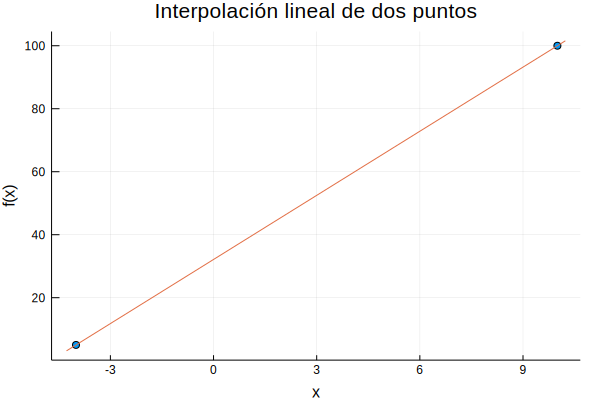

In [17]:
scatter([-4,10],[5,100],legend=false)
plot!(interpolar2(-4,5,10,100),
xlabel="x",
ylabel="f(x)",
title="Interpolación lineal de dos puntos")

#### Ejercicio 2

Hagamos lo mismo con tres puntos:

(i) Encuentra un polinomio $L_1(x)$ sencillo, tal que $L(x)$ sea igual a $0$ para $x=x_2$ y $x=x_3$. Ahora normalízalo para que $L_1(x_1) = 1$. ¿De qué grado es el polinomio?

<font color="blue"> Grado N-1 (2)</font>

Si $X_2$ y $X_3$ son raices de $L_{1}$ entonces $L_{1}(x)=(x-x_2)(x-x_3)$ para que $L_{1}(x1)=1$ se divide entre su valor es decir:

$L_{1}(x)=\frac{(x-x_2)(x-x_3)}{(x_1-x_2)(x_1-x_3)}$

(ii) De manera similar, encuentra $L_i(x)$ que sea igual a $1$ en $x_i$, y que se anule en $x_j$ para $j \neq i$, para $i=2, 3$.

Si $X_j$ y $X_{j+1}$ son raices de $L_{i}$ entonces $L_{i}(x)=(x-x_j)(x-x_{j+1})$ para que $L_{i}(x_i)=1$ se divide entre su valor es decir:

$L_{i}(x)=\frac{(x-x_j)(x-x_{j+1})}{(x_i-x_j)(x_i-x_{j+1})}$

(iii) Implementa estas funciones como una función `L(i, x)` que toma $i$ y $x$ como argumentos y  calcule la función $L_i$ evaluada en el punto $x$. 

In [18]:
function L(i,A) #A es un arreglo de valores x
    
B=[]
    
normalización=x->1    
   
    for j in 1:length(A)
        
        b=x->x-A[j]
        
        push!(B,b)
        
    end 
    
    for j in 1:length(A)
            
        if j==i
            
            normalización=normalización
            
        else
            
        normalización=normalización*B[j]
        
        end
    end
    
        c=1
        
      for j in 1:length(A)
        
            if j==i
            
            else 
            c=c*(A[i]-A[j])
            
            end
        end
    
    return (1/c)*normalización
    
end

L (generic function with 1 method)

In [19]:
L(1,[32,223,154,344,554,654,745,845,9,987877,5454,544,33,244,41,])(654)

0.0

(iv) Calcula la función $L(x)$ que interpola los tres puntos simultáneamente, basado en las funciones $L_i$ que acabas de encontrar. ¿Qué tipo de polinomio es?

In [20]:
function   L(i,A,x)
   
    return L(i,A)(x)    
end

L (generic function with 2 methods)

#### Ejercicio 3

Ahora generalicemos esto a $N$ puntos:

(i) Encuentra un polinomio $L_1(x)$ sencillo, tal que $L(x)$ sea igual a $0$ para $x=x_2$, $x=x_3$, $x=x_N$. Ahora normalízalo para que $L_1(x_1) = 1$. ¿De qué grado es el polinomio?

<font color="blue"> De grado N-1</font>

(ii) De manera similar, encuentra $L_i(x)$ que sea igual a $1$ en $x_i$, y que se anule en $x_j$ para $j \neq i$.

(iii) Implementa estas funciones como una función `L(i, x)` que toma $i$ y $x$ como argumentos y  calcule la función $L_i$ evaluada en el punto $x$. 

In [21]:
function   L(i,A,x)
   
    return L(i,A)(x)   
    
end

L (generic function with 2 methods)

(iv) Dibuja algunas $L_i$ como función de $x$ para $N$ chiquitas. Asegúrate de que sí se comporten correctamente, es decir que sí tomen los valores $1$ y $0$ en donde deben.

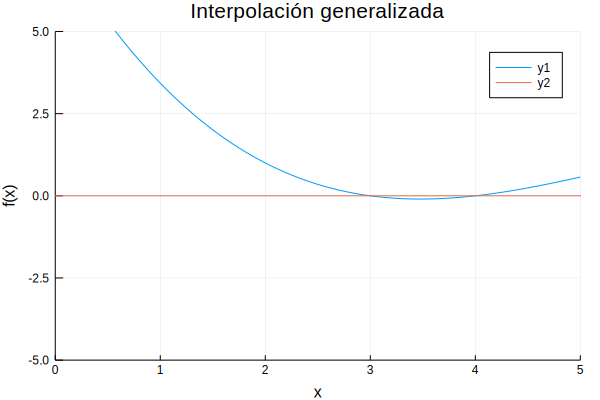

In [22]:
a=0:0.001:5
plot(L(1,[2,9,4,3]),a,
title="Interpolación generalizada",
xlabel="x",
ylabel="f(x)")
ylims!(-5,5)
hline!([0])

#### Ejercicio 4

(i) Utiliza las $L_i$ que encontraste en el ejercicio 2 para interpolar los datos $(x_i, y_i)_{i=1}^N$ con un polinomio $p$. ¿De qué orden es el polinomio resultante? Nota que $p$ es *único* en el conjunto de polinomios con grado $\le$ el grado de $p$.

<font color="blue"> Del orden N-1</font>

(ii) Escribe una función `interpolar` que acepta un vector `x` de las $x_i$ y otro vector `y` de las $y_i$, y regresa *una función* que las interpole. [Pista: Puedes definir la función adentro de la función `interpolar` y regresar esta misma función.]

In [23]:
function interpolar(X,Y)
    
    
    if length(X)!=length(Y)
        error("Error")
           
    else  
    
    a=x->0
        
            for i in 1:length(X)

            a=a+Y[i]*L(i,X)

            end

    return a   
    end
end

interpolar (generic function with 1 method)

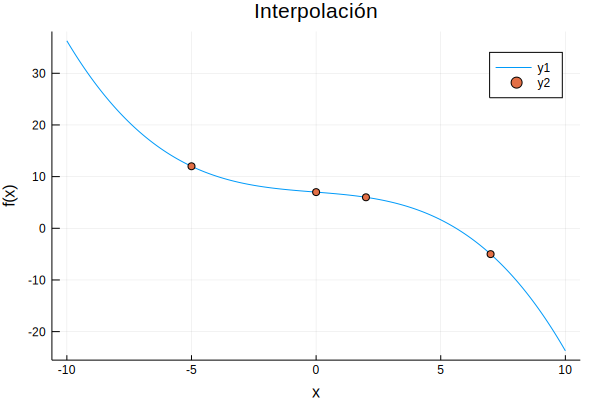

In [24]:
plot(interpolar([2,-5,7,0],[6,12,-5,7]),-10:0.001:10,
title="Interpolación",
xlabel="x",
ylabel="f(x)")
scatter!([2,-5,7,0],[6,12,-5,7])

(iii) Toma funciones polinomiales de orden $n$ diferentes, y genera $n+1$ datos al *muestrear* (es decir, evaluar) la función en distintos puntos $x_i$, espaciados de forma uniforme. Dibuja la función original y la función interpolada en estos puntos.

In [25]:
function muestreo(p,N,a,b)
    
    rango=linspace(a,b,N)
    
    polinomio=[p(i) for i in rango]
    
    return rango, polinomio 
    
end

muestreo (generic function with 1 method)

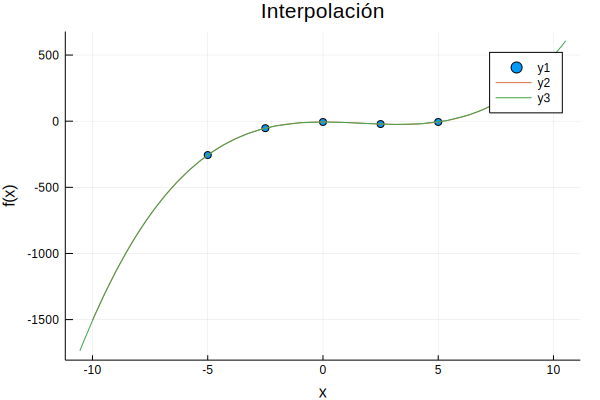

In [26]:
scatter(muestreo(x->x^3-(5x^2)-6,5,-5,5))
plot!(interpolar(muestreo(x->x^3-(5x^2)-6,5,-5,5)[1],muestreo(x->x^3-(5x^2)-6,5,-5,5)[2]),-10:0.001:10)
plot!(x->x^3-(5x^2)-6,
title="Interpolación",
xlabel="x",
ylabel="f(x)")

(iv) Intenta interpolar la función $\sin(x)$. ¿Funciona bien?

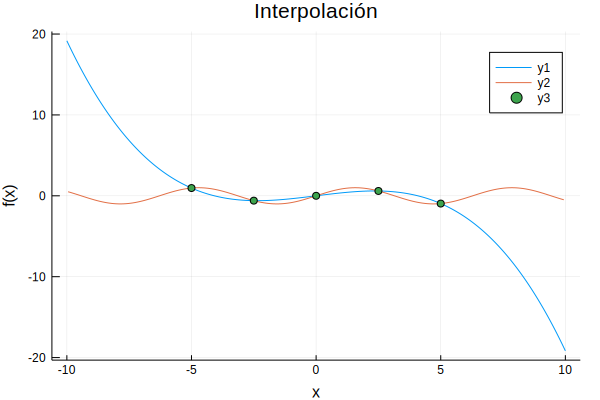

In [27]:
plot(interpolar(muestreo(x->sin(x),5,-5,5)[1],muestreo(x->sin(x),5,-5,5)[2]),-10:0.001:10)
plot!(x->sin(x))
scatter!(muestreo(x->sin(x),5,-5,5),
title="Interpolación",
xlabel="x",
ylabel="f(x)")

<font color="blue"> No funciona adecuadamente</font>

#### Ejercicio 5

Considera la función de Runge, $f(x) = \frac{1}{1+25x^2}$, en la región $x \in [-1, 1]$. Interpólala con tu función `interpolar` para distintos números $N$ de puntos. ¿Qué observas? Utiliza `@manipulate` para variar el número de puntos muestreados / grado del polinomio interpolador.

In [28]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6e3151eb634bc44ab7fcb5d4c40abaee142d915e-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/6e3151eb634bc44ab7fcb5d4c40abaee142d915e-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [29]:
@manipulate for i in 1:1:20
    
    plot(interpolar(muestreo(x->1/(1+25x^2),i,-1,1)[1],muestreo(x->1/(1+25x^2),i,-1,1)[2]),-2:0.001:2,ylims=(-1,2))
    plot!(x->(1/(1+25x^2)))
    scatter!(muestreo(x->1/(1+25x^2),i,-1,1),
title="Interpolación",
xlabel="x",
ylabel="f(x)")
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-eb5eaecd-034f-4113-89e1-e367f33f8d5f", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 20),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_01", 10, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/jrun/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/jrun/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/jrun/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/jrun/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/jrun/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":10}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.value();},thi

<font color="blue"> En las fronteras del dominio, la interpolación diverge mucho de la función de Runge</font>

## Interpolación en puntos espaciados no-uniformemente

Le que acabas de observar se llama el **fenómeno de Runge**. Esto demuestra que en general *es una mala idea* interpolar en puntos uniformemente espaciados. Sin embargo, resulta que el problema no es la interpolación en sí, sino la elección de puntos en donde interpolar: una solución es el tomar puntos en el intervalo $[-1,1]$, espaciados tales que se amontonen cerca de los puntos extremos del intervalo. [La razón por esto se puede entender con la teoría de potenciales ("potential theory"); ver e.g. Trefethen, *Approximation Theory and Approximation Practice*.] 

Lo más común es utilizar los llamados **puntos de Chebyshev** con parámetro $n$, definidos como 

$$x_j := \cos \left( \frac{j \pi}{n} \right) \quad \text{con } 0 \le j \le n.$$

#### Ejercicio 6

(i) Escribe una función que calcula los puntos de Chebyshev para un valor de $n$ dado.

In [30]:
function puntos_Chebyshev(N)

return [cos(i*π/N) for i in 0:1:N]

end

puntos_Chebyshev (generic function with 1 method)

(ii) Escribe una función que interpola una función dada en los puntos de Chebyshev. Grafica los resultados.

In [31]:
function  interpolar_Chebyshev(f,N)
    
    interpolar(puntos_Chebyshev(N),[f(i) for i in puntos_Chebyshev(N)]) 
end

interpolar_Chebyshev (generic function with 1 method)

(iii) Interpola la función de Runge con puntos de Chebyshev. ¿Qué observas?

In [32]:
@manipulate for i in 1:1:20
    
   plot(interpolar_Chebyshev(x->1/(1+25x^2),i),-2:0.001:2,ylims=(-1,2),lw=4)
    plot!(x->1/(1+25x^2))
    scatter!(puntos_Chebyshev(i),[(x->1/(1+25x^2))(x) for x in puntos_Chebyshev(i)],
title="Interpolación con puntos de Chebyshev",
xlabel="x",
ylabel="f(x)")
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_08", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-95e3f9b4-37cc-4078-bda8-278476191b16", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 20),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_07", 10, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/jrun/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/jrun/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/jrun/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/jrun/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/jrun/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":10}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.computed(function () {return this.value();},thi

<font color="blue">La interpolación se comporta mejor en los límites del dominio</font>

#### Ejercicio 7

(i) Dada una función $f$, calcula numéricamente el error al utilizar la interpolación de Chebyshev $p$ con respecto a la función original $f$, dado por la norma

$$\|f - p\|_{\infty} := \sup_x |f(x) - p(x)|,$$

para distintos números de puntos de Chebyshev.

In [33]:
function  Error_Chebyshev(f,N)
    
   b=[abs(f(i)-interpolar_Chebyshev(f,N)(i)) for i in -1:0.0001:1]
    return maximum(b)
     
end

Error_Chebyshev (generic function with 1 method)

(ii) Conforme se aumenta el número de puntos, ¿cómo es la convergencia a $0$ del error?  

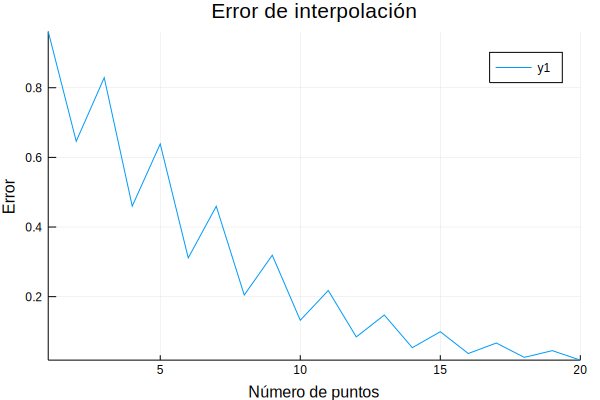

In [34]:
plot(N->Error_Chebyshev(x->1/(1+25x^2),N), 1:1:20,
title="Error de interpolación",
xlabel="Número de puntos",
ylabel="Error")

<font color="blue">Converge logarítmicamente</font>

#### Ejercicio 8

Resulta que la tasa de convergencia depende de qué tan suave sea la función.
Por ejemplo, inténtalo con la función `abs` y con la función `floor`.

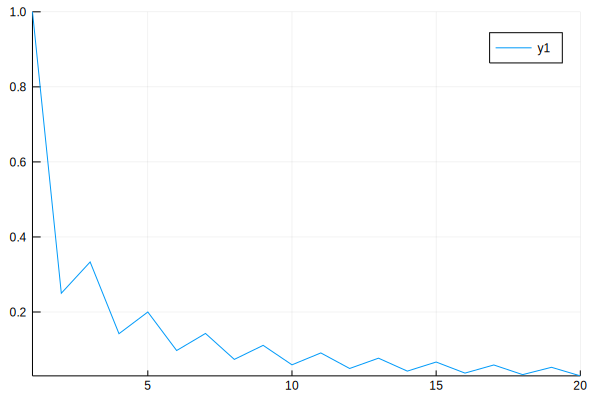

In [35]:
plot(N->Error_Chebyshev(x->abs(x),N), 1:1:20)

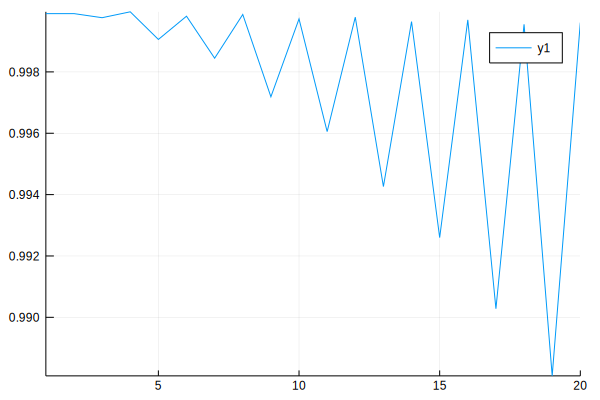

In [36]:
plot(N->Error_Chebyshev(x->floor(x),N), 1:1:20)

## Hacia el futuro

Lo que hemos logrado es reemplazar (aproximar) una función continua $f$ por un conjunto discreto de sus valores $f(x_i)$ en la **malla** $(x_i)_{i=1}^N$. Ahora podremos manipular la función ¡al manipular sólo estos valores discretos!

Resulta que es más útil cambiar de punto de vista, y utilizar la llamada [**interpolación baricéntrica**](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf).

Luego llevamos a cabo un **cambio de base** en el espacio de polinomios, y utilizamos los **polinomios de Chebyshev** en lugar de los polinomios basados en $x^i$.

La idea es escribir el polinomio interpolante como una suma de polinomios de Chebyshev y examinar los coeficientes de estos polinomios, que tienen propiedades muy útiles. Esto lo podremos ver hasta después de ver álgebra lineal numérica.  ¡Podría formar un proyecto final interesante!  